# 第四章 随机数与抽样模拟 P54

注意⚠️事项：
Python中的随机数生成和统计函数可能与R中的函数有所不同，但它们的基本思想和用法是相似的。
在Python中，使用numpy和scipy库来进行数学和统计计算。
对于多元正态分布，使用了scipy的multivariate_normal函数。
Python和R的函数库和实现方式存在差异


## 读取所需的库

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import norm, expon, binom, multivariate_normal

## 4.1 一元随机数的产生

In [ ]:
# 4.1.1 均匀分布随机数
np.random.seed(1)
print(np.random.uniform(1, 3, 3))
print(np.random.uniform(size=5))

In [ ]:
# 4.1.2 正态分布随机数
print(np.random.normal(10, 5, 5))
print(np.random.normal(size=5))
x = np.random.normal(size=100)
plt.hist(x, density=True)
plt.plot(np.linspace(-3, 3, 100), norm.pdf(np.linspace(-3, 3, 100)))
plt.show()

In [ ]:
# 4.1.3 指数分布随机数
x = np.random.exponential(10, 100)
plt.hist(x, density=True)
plt.plot(np.linspace(0, 50, 100), expon.pdf(np.linspace(0, 50, 100), scale=10))
plt.show()

In [ ]:
# 4.1.4 离散分布随机数的生成
print(np.random.binomial(1, 0.5, 10))
print(np.random.binomial(10, 0.5, 5))

## 4.2 多元随机数的生成

In [ ]:
# 4.2.1 多元正态分布随机数
Sigma = np.array([[10, 3], [3, 2]])
x = np.random.multivariate_normal([0, 0], Sigma, 1000)
print(x[:5])
print(np.cov(x, rowvar=False))

In [ ]:
# 4.2.2 多元正态分布密度函数/分位数与累积概率
mean = np.zeros(5)
lower = np.full(5, -1)
upper = np.full(5, 3)
corr = np.eye(5)
corr[corr == 0] = 0.5
prob = multivariate_normal.cdf(x=upper, mean=mean, cov=corr) - multivariate_normal.cdf(x=lower, mean=mean, cov=corr)
print(prob)

## 4.3 随机抽样

In [ ]:
# 4.3.1 放回与无放回抽样
print(np.random.choice(range(1, 7), 10, replace=True))
print(np.random.choice(100, 10, replace=False))
dice = [f"{i}{j}" for i in range(1, 7) for j in range(1, 7)]
print(np.random.choice(dice, 5, replace=True))
print(dice)

In [ ]:
# 4.3.2 bootstrap重抽样

# 跳过SSL验证（注意：这种方法存在安全风险）
#import ssl
#ssl._create_default_https_context = ssl._create_unverified_context

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Here, I'm using the faithful dataset from seaborn library
faithful = sns.load_dataset('faithful')
eruptions = faithful['eruptions'].values

print(np.random.choice(eruptions, 10, replace=True))
sample = np.random.choice(eruptions, 1000, replace=True)

plt.subplot(1, 2, 1)
plt.hist(eruptions, bins=25)

plt.subplot(1, 2, 2)
plt.hist(sample, bins=25)

plt.show()


## 4.4 统计模拟

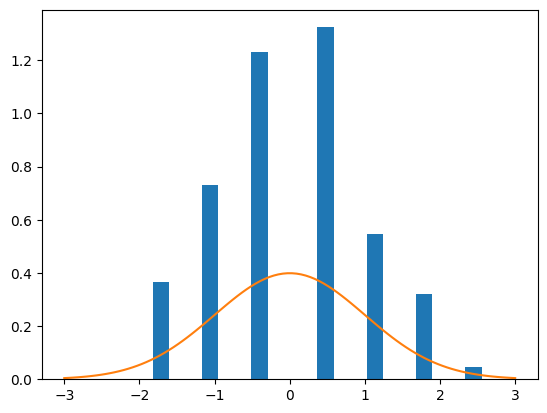

In [22]:
# 4.4.1 几种常见的模拟方法
n, p = 10, 0.25
z = np.random.binomial(n, p, 1)
x = (z - n * p) / np.sqrt(n * p * (1 - p))
m = 100
z = np.random.binomial(n, p, m)
x = (z - n * p) / np.sqrt(n * p * (1 - p))
plt.hist(x, density=True, bins=20)
plt.plot(np.linspace(-3, 3, 100), norm.pdf(np.linspace(-3, 3, 100)))
plt.show()

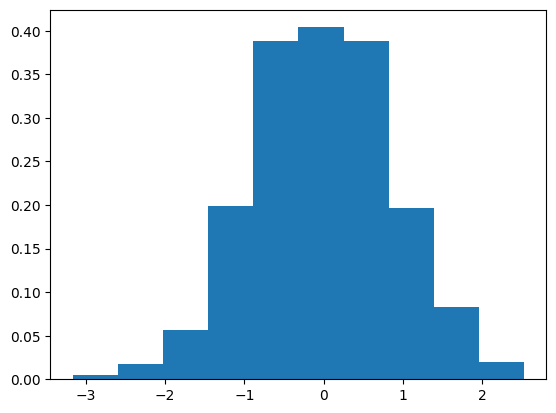

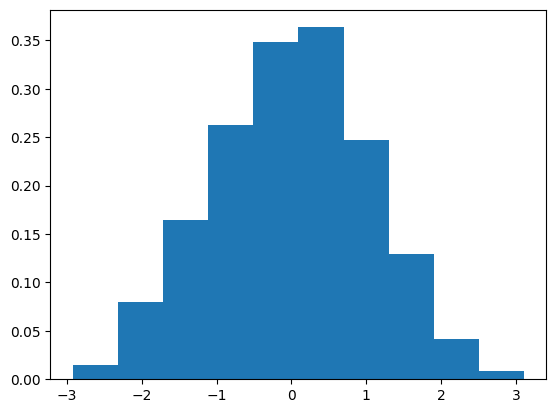

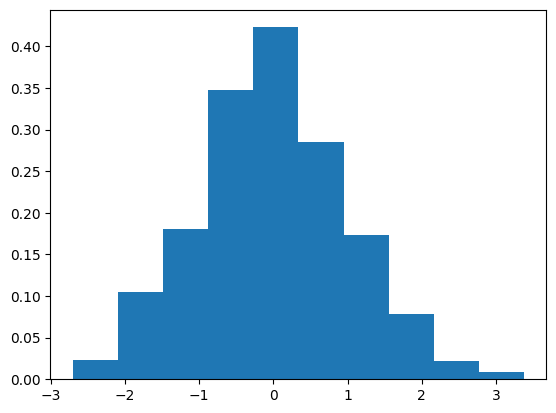

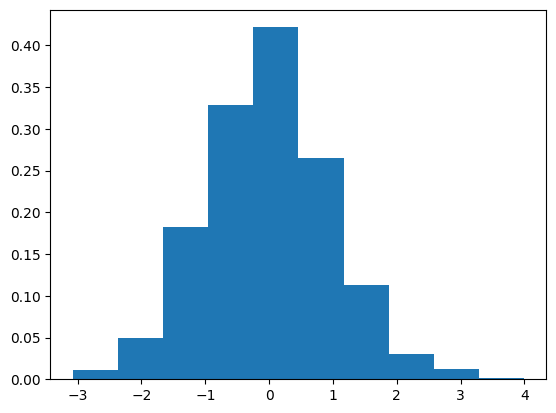

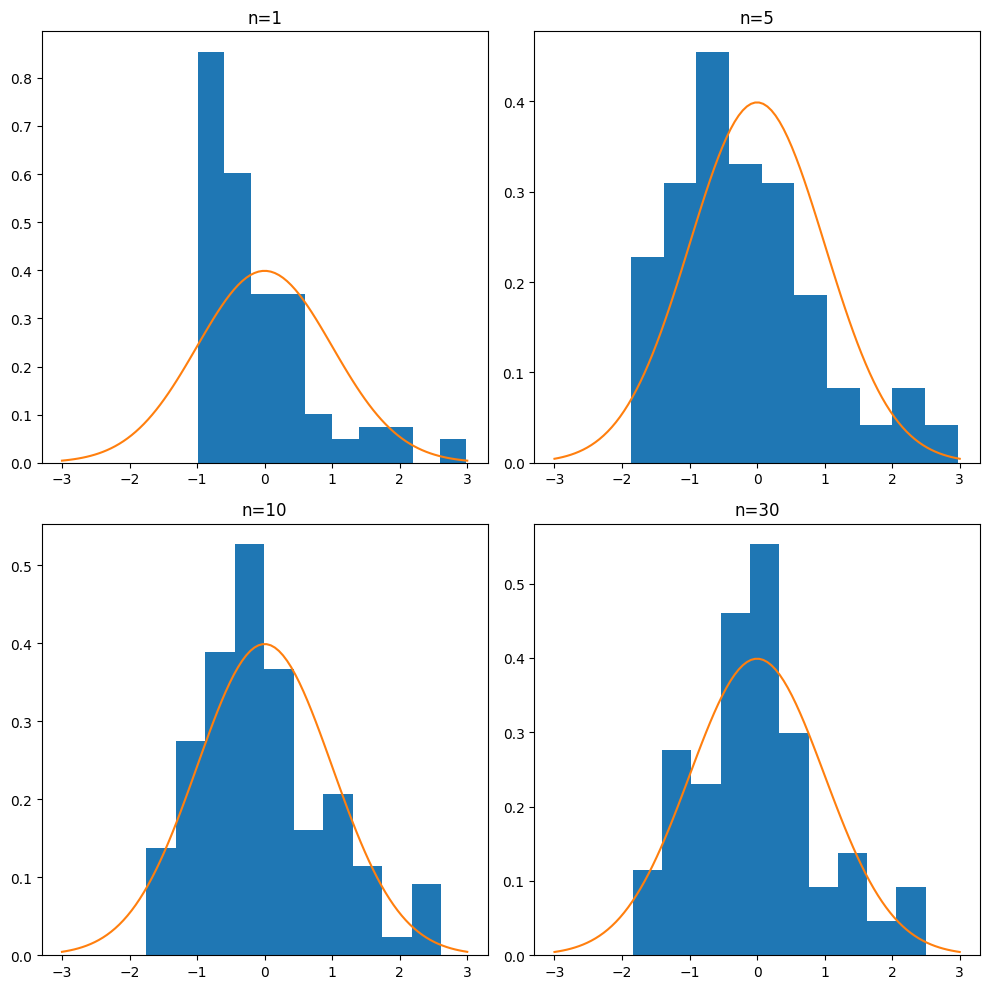

In [23]:
# 4.4.2 模拟函数的建立方法
def sim_fun(m, f, *args):
    return [f(*args) for _ in range(m)]

# 二项分布
def f_binom(n=10, p=0.5):
    s = np.random.binomial(n, p)
    return (s - n * p) / np.sqrt(n * p * (1 - p))

x = sim_fun(1000, f_binom)
plt.hist(x, density=True)
plt.show()

# 均匀分布
def f_uniform(n=10):
    return (np.mean(np.random.uniform(size=n)) - 0.5) / (1/np.sqrt(12*n))

x = sim_fun(1000, f_uniform)
plt.hist(x, density=True)
plt.show()

# 正态分布
def f_normal(n=10, mu=0, sigma=1):
    r = np.random.normal(mu, sigma, n)
    return (np.mean(r) - mu) / (sigma/np.sqrt(n))

x = sim_fun(1000, f_normal)
plt.hist(x, bins=10, density=True)
plt.show()

x = sim_fun(1000, f_normal, 30, 5, 2)
plt.hist(x, bins=10, density=True)
plt.show()

# 指数分布
def f_exp(n, mu=10):
    return (np.mean(np.random.exponential(mu, n)) - mu) / (mu/np.sqrt(n))

x = np.linspace(-3, 3, 100)
plt.figure(figsize=(10, 10))
for idx, n in enumerate([1, 5, 10, 30], 1):
    plt.subplot(2, 2, idx)
    plt.hist(sim_fun(100, f_exp, n, 10), density=True)
    plt.plot(x, norm.pdf(x))
    plt.title(f"n={n}")
plt.tight_layout()
plt.show()